In [2]:
# homework 7. Implement Cubic B-spline.

This implementation defines a function cubic_b_spline that computes a point on a cubic B-spline curve for a given parameter t, a list of control points points, and a knot vector knots. The function returns the (x,y) coordinates of the point on the curve.

The B-spline algorithm requires m+n+1 knots for n control points, where m is the degree of the spline. Since we're using cubic splines (m=3), the total number of knots should be n+4

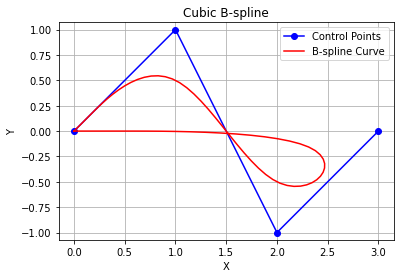

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def cubic_b_spline(control_points, num_points=100):
    # Generate the knot vector
    n = len(control_points)
    k = 4  # Cubic B-spline
    t = np.linspace(0, 1, n + k)

    # Basis functions
    def N(i, k, u, t):
        if k == 1:
            return 1.0 if t[i] <= u < t[i+1] else 0.0
        else:
            result = 0
            if t[i+k-1] != t[i]:
                result += (u - t[i]) / (t[i+k-1] - t[i]) * N(i, k-1, u, t)
            if t[i+k] != t[i+1]:
                result += (t[i+k] - u) / (t[i+k] - t[i+1]) * N(i+1, k-1, u, t)
            return result

    # Calculate points on the curve
    curve_points = np.zeros((num_points, 2))
    for i in range(num_points):
        u = i / (num_points - 1)
        curve_point = np.zeros(2)
        for j, p in enumerate(control_points):
            curve_point += p * N(j, k, u, t)
        curve_points[i] = curve_point

    return curve_points

# Example control points
control_points = np.array([
    [0, 0],
    [1, 1],
    [2, -1],
    [3, 0]
])

# Generate the B-spline curve
curve = cubic_b_spline(control_points)

# Plot the control points and the curve
plt.plot(control_points[:, 0], control_points[:, 1], 'bo-', label='Control Points')
plt.plot(curve[:, 0], curve[:, 1], 'r-', label='B-spline Curve')
plt.title('Cubic B-spline')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()